In [4]:
import cv2
import numpy as np
from deepface import DeepFace

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_model = DeepFace.build_model('Emotion')

def face_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

def mood_detection(image):
    faces = face_detection(image)
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        detected_emotions = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        emotion = max(detected_emotions['emotion'].items(), key=lambda x: x[1])[0]
        return emotion

def my_face(image, face_folder):
    faces = face_detection(image)
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        detected_faces = DeepFace.find(face, db_path=face_folder, enforce_detection=False)
        if len(detected_faces) > 0:
            return True
    return False

def test(face_folder):
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        if my_face(frame, face_folder):
            mood = mood_detection(frame)
            cv2.putText(frame, f"The current emotion is: {mood}", (50, 50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        else:
            cv2.putText(frame, "Face not yours!", (50, 50), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('test', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
face_folder = 'C:/Users/Jowstenn/mccarthyimg'
test(face_folder)

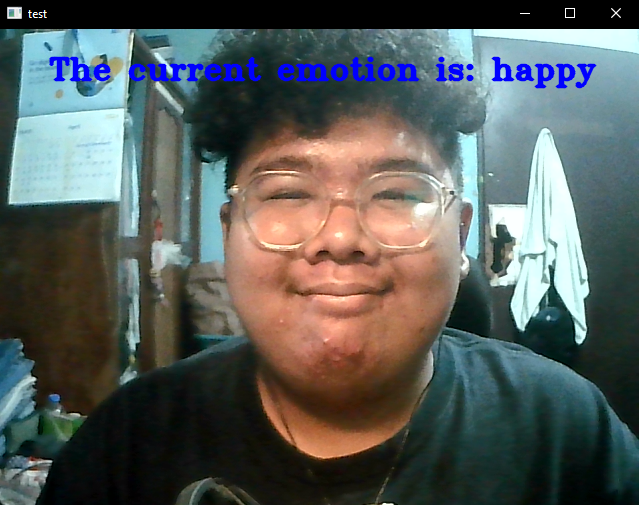

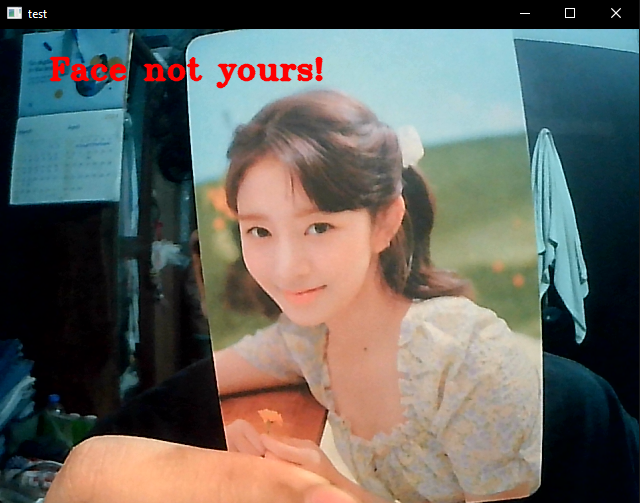